In [45]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import calendar

import datetime as dt

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff



# #Loading Dataset

In [46]:
df=pd.read_csv("Unemployment in India.csv")

In [47]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


# #Data Cleaning

In [48]:
df.shape  

(768, 7)

In [49]:
#That means there are 768 rows and 7 columns.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [51]:
#Statistical summary of the data within dataframe
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [52]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [53]:
df.replace(np.nan, 0)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,0,0,0,0.00,0.0,0.00,0
764,0,0,0,0.00,0.0,0.00,0
765,0,0,0,0.00,0.0,0.00,0
766,0,0,0,0.00,0.0,0.00,0


In [54]:
#changing column names
df.columns=['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Area']

In [55]:
df.head(3)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural


In [56]:
#converting the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [57]:
#converting the 'Frequency' column to categorical data type
df['Frequency']= df['Frequency'].astype('category')

In [58]:
#extracting the 'Month' from the Date
df['Month'] =  df['Date'].dt.month

In [59]:
df['Month'] = df['Month'].fillna(1)  # replace fill_value with the value you want to use
df['MonthNumber'] = df['Month'].apply(lambda x : int(x))

In [60]:
#creating a new column 'MonthName' by converting the 'MonthNumber' column values to the monthNames
df['MonthName'] =  df['MonthNumber'].apply(lambda x: calendar.month_abbr[x])

In [61]:
#ensuring the categorical vairable
df['States'] = df['States'].astype('category')

In [62]:
df['Area'] = df['Area'].astype('category')

In [63]:
#dropping the Month column as it in irrelevant now
#we have extracted the monthNumbers and monthNames individually
df.drop(columns='Month',inplace=True)
df.head(3)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,MonthNumber,MonthName
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul


# #Statistics

In [64]:
df.describe()

,Date,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,MonthNumber
count,740,740.000000,7.400000e+02,740.000000,768.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122,6.194010
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000,1.000000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500,4.000000
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000,6.000000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000,9.000000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000,12.000000
std,NaN,10.721298,8.087988e+06,8.111094,3.332526


In [65]:
#5-number summary of the numerical variables which give some information
round(df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].describe().T,2)

#rounded to 2 decimal points and transposed to get a horizontal version

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,740.0,11.79,10.72,0.00,4.66,8.35,15.89,76.74
Estimated Employed,740.0,7204460.03,8087988.43,49420.00,1190404.50,4744178.50,11275489.50,45777509.00
Estimated Labour Participation Rate,740.0,42.63,8.11,13.33,38.06,41.16,45.50,72.57


In [66]:
#grouping by 'Region' and finding mean values for the numerical columns
regionStats = df.groupby(['States'])[['Estimated Unemployment Rate',
                                      'Estimated Employed',
                                      'Estimated Labour Participation Rate']].mean().reset_index()

#rounding the values to 2 decimal points
round(regionStats,2)

,States,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,Andhra Pradesh,7.48,8154093.18,39.38
1,Assam,6.43,5354772.15,44.87
2,Bihar,18.92,12366189.14,38.15
3,Chandigarh,15.99,316831.25,39.34
4,Chhattisgarh,9.24,4303498.57,42.81
5,Delhi,16.50,2627512.86,38.93
6,Goa,9.27,226308.33,39.25
7,Gujarat,6.66,11402012.79,46.10
8,Haryana,26.28,3557072.46,42.74
9,Himachal Pradesh,18.54,1059823.71,44.22


In [67]:
df['States'].unique()

['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', ..., 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', NaN, 'Chandigarh']
Length: 29
Categories (28, object): ['Andhra Pradesh', 'Assam', 'Bihar', 'Chandigarh', ..., 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']

# #Exploratory Analysis

In [68]:
#Distribution of State Parameter

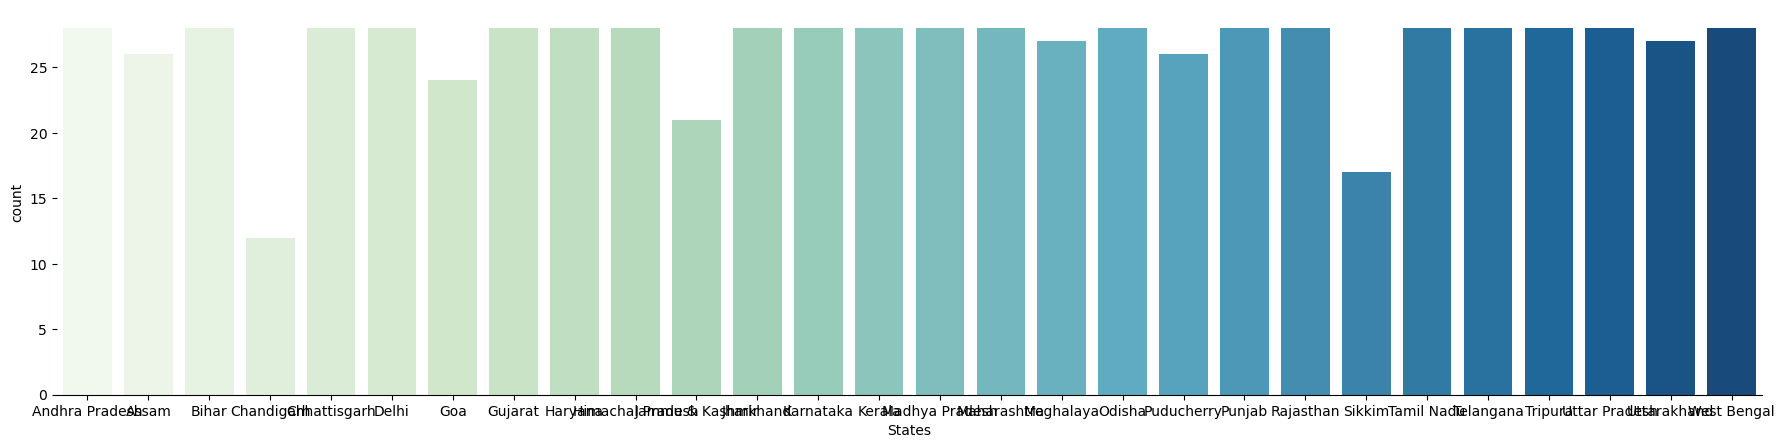

In [69]:
plt.figure(figsize=(22,5))
sns.countplot(x='States',data=df,palette="GnBu")
sns.despine(left=True)

In [70]:
df['States'].value_counts()

States
Andhra Pradesh      28
Karnataka           28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Maharashtra         28
Kerala              28
Madhya Pradesh      28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
West Bengal         28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

In [71]:
#relationship between State and Estimated Employed

<Axes: xlabel='States', ylabel='Estimated Employed'>

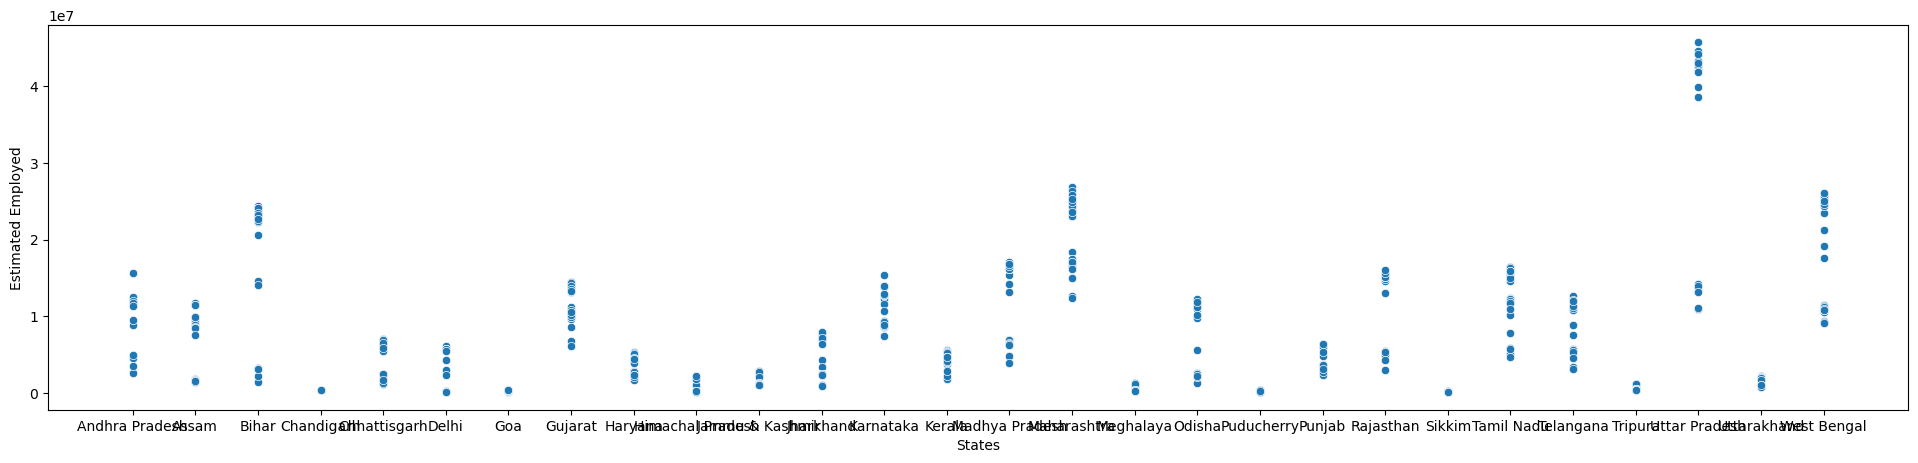

In [72]:
plt.figure(figsize=(24,5))
sns.scatterplot(x='States',y='Estimated Employed',data=df)

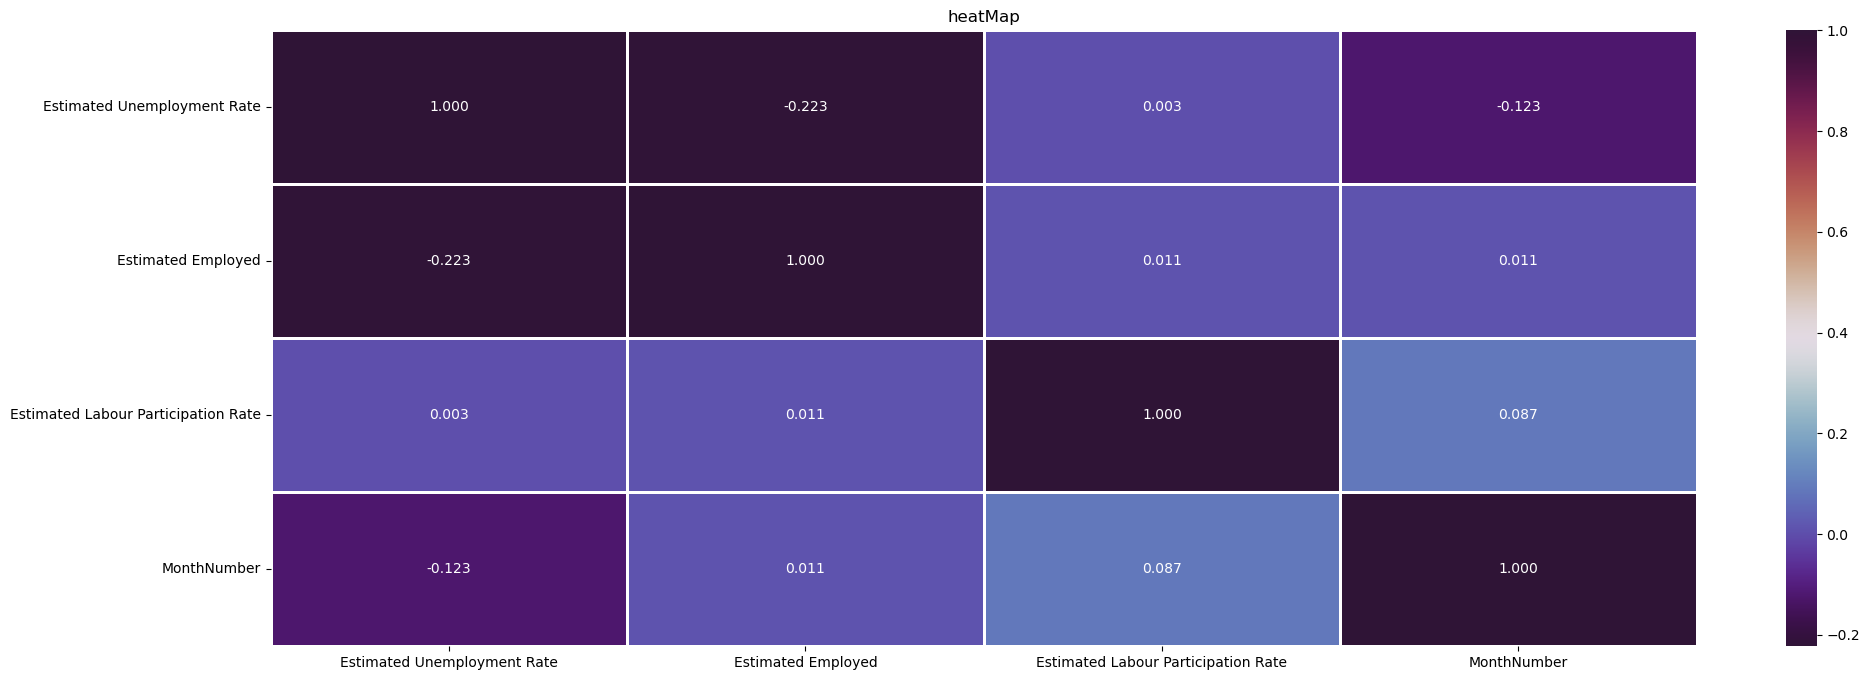

In [73]:
#constructing a 'heatMap' to find the 'pair-wise correlation' values
heatMap = df[['Estimated Unemployment Rate', 'Estimated Employed', 
              'Estimated Labour Participation Rate','MonthNumber']]


heatMap = heatMap.corr()


plt.figure(figsize=(23,8))
sns.heatmap(heatMap, annot=True,cmap='twilight_shifted', fmt='.3f', linewidths=1)
plt.title('heatMap')
plt.show()

In [74]:
#plotting a box-plot to show un-employment rate in each state
fig = px.box(
    df,
    x='States',
    y='Estimated Unemployment Rate',
    color='States',
    title='unemploymentRate',
    template='plotly'
)
fig.show()

In [75]:
#plotting a "Bar-plot" to find the "average unemployment rate in each state"
newDF = df[['Estimated Unemployment Rate','States']]

#grouping the dataframe by 'States' and finding the corresponding 'mean'
newDF = newDF.groupby('States').mean().reset_index()

#sorting the values in the dataframe
newDF = newDF.sort_values('Estimated Unemployment Rate')

fig = px.bar(newDF, 
             x='States',
             y='Estimated Unemployment Rate',
             color='States',
             title='State-wise Average Employment Rate')
fig.show()

In [76]:
#plotting a "Bar-plot" to find the "unemployment rate" for each "Region" month-wise
fig = px.bar(df, 
             x='States',
             y='Estimated Unemployment Rate',
             animation_frame = 'MonthName',
             color='States',
             title='Region-wise Unemployment Rate',
             height=800)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500

fig.show()


In [ ]:
df['Area'].value_counts()

Area
Urban    381
Rural    359
Name: count, dtype: int64

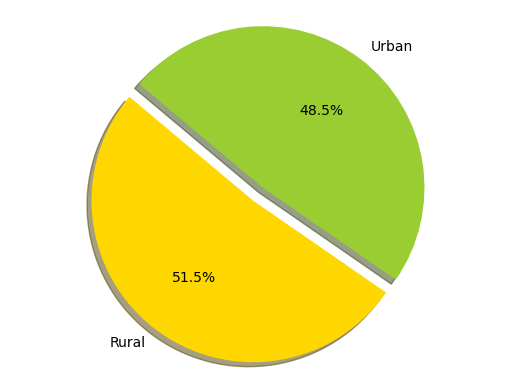

In [ ]:
# Data to plot
Area = 'Rural','Urban'
sizes = [381,359]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=Area, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()


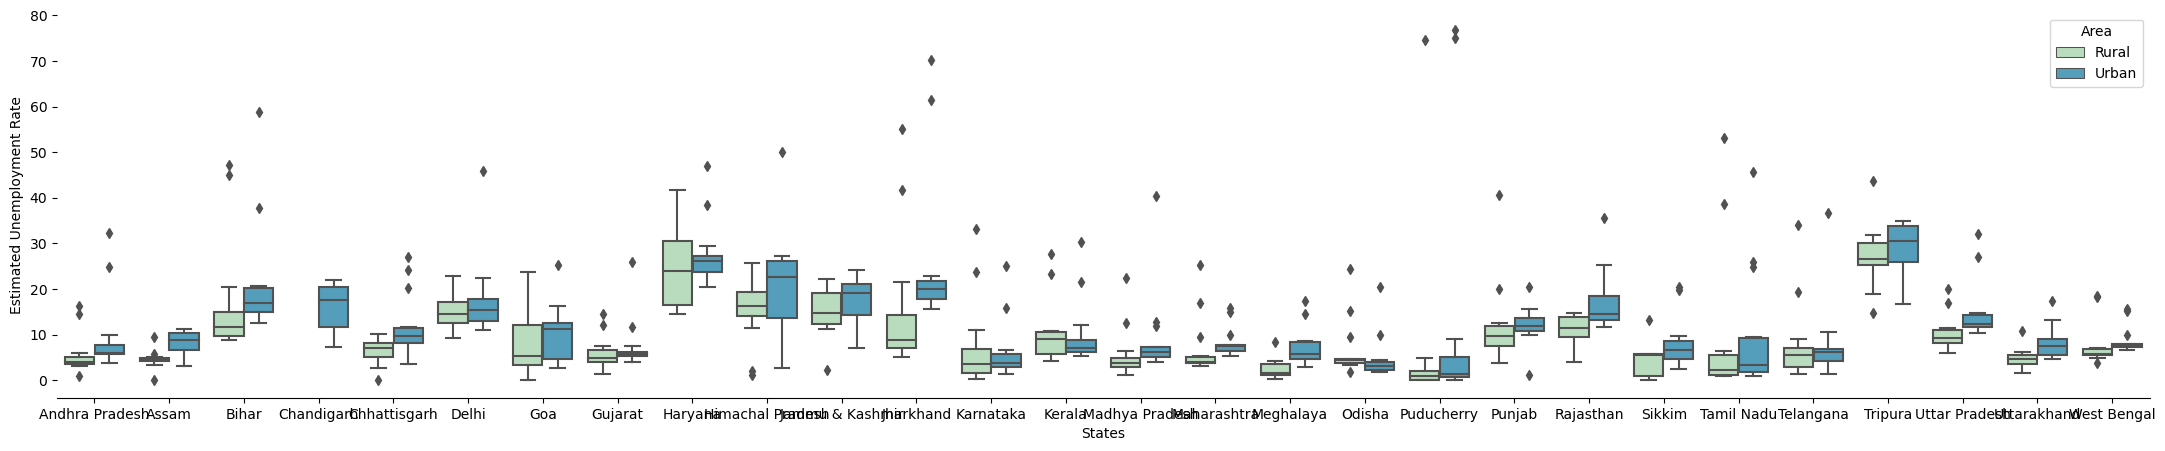

In [ ]:
plt.figure(figsize=(27,5))
sns.boxplot(x='States',y="Estimated Unemployment Rate",data=df,palette="GnBu",hue='Area')
sns.despine(left=True)

The above one is the relationship of states and area with respect to the Unemployment Rate in India

# Impact of Lockdown on States Estimated Employed

In [ ]:
#filtering dataset between month 4 and 7 (inclusive) - after lockdown
df47 = df[(df['MonthNumber'] >= 4) & (df['MonthNumber'] <=7)]

#filtering dataset between month 1 and 4 (inclusive) - before lockdown
df14 = df[(df['MonthNumber'] >= 1) & (df['MonthNumber'] <=4)]

In [ ]:
#finding the corresponding mean values
df47g = df47.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

df14g = df14.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

#clubbing the 2 dataframe values
df47g['Unemployment Rate before lockdown'] = df14g['Estimated Unemployment Rate']

#renaming the column values for better understanding
df47g.columns = ['States','unemploymentRate A/ lockdown','unemploymentRate B/ lockdown']

#displaying the top results
df47g.head()

,States,unemploymentRate A/ lockdown,unemploymentRate B/ lockdown
0,Andhra Pradesh,10.054167,10.756250
1,Assam,6.049091,6.750000
2,Bihar,25.370000,23.690000
3,Chandigarh,14.942500,19.366667
4,Chhattisgarh,11.659167,9.028750


In [ ]:
#computing the % change in unemployment rate
df47g['% change in unemployment'] = round(df47g['unemploymentRate A/ lockdown'] - df47g['unemploymentRate B/ lockdown']/df47g['unemploymentRate B/ lockdown'],2)

In [ ]:
#sorting the values in the "after lockdown dataframe" on the basis of "%change in unemployment"
df47g = df47g.sort_values('% change in unemployment')

In [ ]:
#plotting a 'bar-chart' for the "%change in unemployment A/ lockdown"
fig = px.bar(df47g, x='States',y='% change in unemployment',
             color='% change in unemployment',
             title='% change in Unemployment A/ Lockdown')

fig.show()

: 

In [ ]:
#defining a function to sort the values based on impact
#from the above 'box-plot', the values are ranging between 0 and 40

def sort_impact(x):
    if x <= 10:
        #impactedState
        return '🥲'
    
    elif x <= 20:
        #hardImpactedState
        return '🥲😥'
    
    elif x <= 30:
        #harderImpactedState
        return '🥲😥😖'
    
    elif x <= 40:
        #hardestImpactedState
        return '🥲😥😖🤯'
    
    return x    

: 

In [ ]:
#adding a new column to the 'dataframe', classifying the "%change in employment" on the basis of impactStatus
df47g['impactStatus'] = df47g['% change in unemployment'].apply(lambda x:sort_impact(x))

: 

In [ ]:
#plotting a "bar-graph" to classify and denote the impack of lockdown on employment for different states
fig = px.bar(df47g, 
             y='States',
             x='% change in unemployment',
             color='impactStatus',
             title='Lockdown Impact on Employment in India')

fig.show()

: 